In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D
from tensorflow.keras.applications import VGG16, MobileNet
from tensorflow.keras.layers import concatenate, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten

In [2]:
input=Input(shape=(224,224,3))
x=Conv2D(32,kernel_size=(3,3),activation='relu')(input)
x=MaxPooling2D(pool_size=(2,2))(x)

In [3]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_base=Conv2D(32,kernel_size=(3,3),activation='relu')(input)
vgg16_base=MaxPooling2D(pool_size=(2,2))(vgg16_base)
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenet_base=Conv2D(32,kernel_size=(3,3),activation='relu')(input)
mobilenet_base=MaxPooling2D(pool_size=(2,2))(mobilenet_base)
merged_output = concatenate([vgg16_base, mobilenet_base])

In [4]:
y=merged_output
y = Flatten()(y)
y = Dense(10, 'softmax')(y)
mod = Model(inputs=input, outputs=y)

In [5]:
mod.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 222, 222, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 222, 222, 32  896         ['input_1[0][0]']                
                                )                                                             

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [7]:
Dir='C:/Users/jawad/Music/sl/train'
Cate=['0','1','2','3','4','5','6','7','8','9']

In [8]:
img_size=224
data=[]
for categ in Cate:
    folder=os.path.join(Dir,categ)
    label=Cate.index(categ)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])

In [9]:
import random

In [10]:
random.shuffle(data)

In [11]:
train_images=[]
train_labels=[]
for x,y in data:
    train_images.append(x)
    train_labels.append(y)

In [12]:
train_images=np.array(train_images)
train_labels=np.array(train_labels)

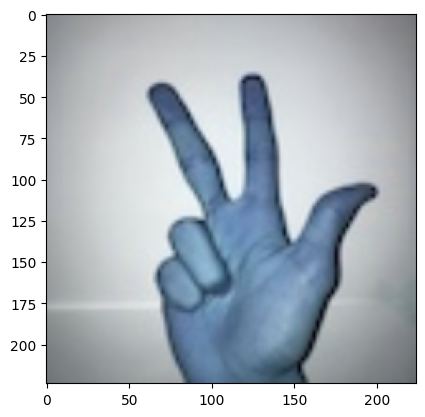

In [13]:
plt.imshow(train_images[8])

In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, num_classes=10)

In [15]:
mod.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mod.fit(train_images , train_labels, epochs=10, batch_size=32)

Epoch 1/10
54/54 [==============================] - 23s 75ms/step - loss: 5927.3076 - accuracy: 0.2436
Epoch 2/10
54/54 [==============================] - 4s 72ms/step - loss: 0.8573 - accuracy: 0.7845
Epoch 3/10
54/54 [==============================] - 4s 72ms/step - loss: 0.1119 - accuracy: 0.9673
Epoch 4/10
54/54 [==============================] - 4s 72ms/step - loss: 0.0366 - accuracy: 0.9907
Epoch 5/10
54/54 [==============================] - 4s 72ms/step - loss: 0.0182 - accuracy: 0.9977
Epoch 6/10
54/54 [==============================] - 4s 72ms/step - loss: 0.0341 - accuracy: 0.9936
Epoch 7/10
54/54 [==============================] - 4s 72ms/step - loss: 0.0292 - accuracy: 0.9953
Epoch 8/10
54/54 [==============================] - 4s 72ms/step - loss: 0.0759 - accuracy: 0.9877
Epoch 9/10
54/54 [==============================] - 4s 72ms/step - loss: 0.0265 - accuracy: 0.9959
Epoch 10/10
54/54 [==============================] - 4s 72ms/step - loss: 0.0174 - accuracy: 0.9982


In [21]:
testDir='C:/Users/jawad/Music/sl/test'
img_size=224
testdata=[]
for categ in Cate:
    folder=os.path.join(testDir,categ)
    label=Cate.index(categ)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        testdata.append([img_arr,label])

In [22]:
test_images=[]
test_labels=[]
for x,y in testdata:
    test_images.append(x)
    test_labels.append(y)

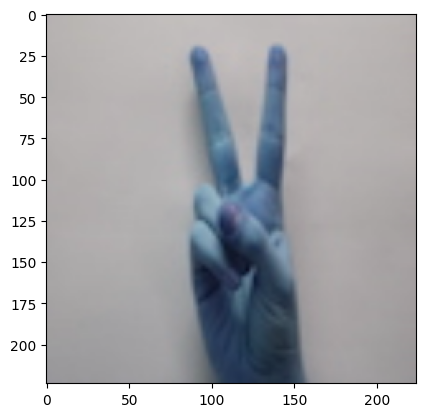

In [23]:
test_images=np.array(test_images)
test_labels=np.array(test_labels)

plt.imshow(test_images[10])

1/1 [==============================] - 0s 18ms/step
Predicated 4
Real 4


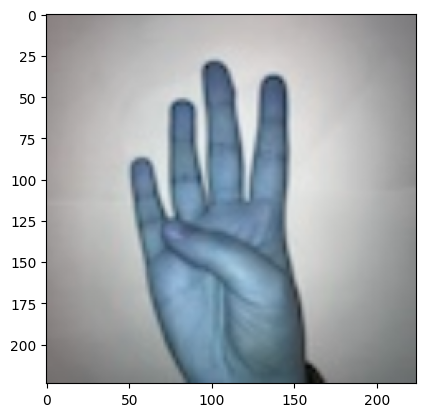

In [24]:
num = 20
prediction = mod.predict(np.array([test_images[num]]))
predicted_class = Cate[np.argmax(prediction)]
print("Predicated "+predicted_class)
print("Real "+Cate[int(test_labels[num])])
plt.imshow(test_images[num])

1/1 [==============================] - 0s 18ms/step
Predicated 5
Real 5


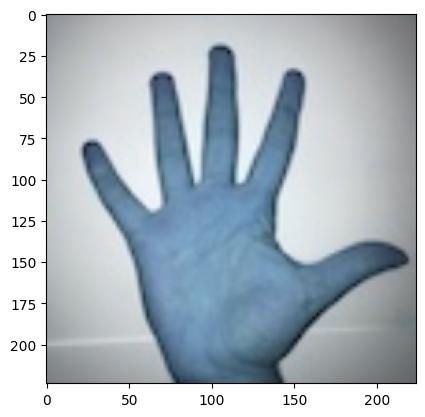

In [25]:
num = 25
prediction = mod.predict(np.array([test_images[num]]))
predicted_class = Cate[np.argmax(prediction)]
print("Predicated "+predicted_class)
print("Real "+Cate[int(test_labels[num])])
plt.imshow(test_images[num])

In [26]:
prediction=[]
for img in test_images:
    p = mod.predict(np.array([img]))
    prediction.append(p)

1/1 [==============================] - 0s 15ms/step


In [27]:
predicted_class = []
for pp in prediction:
    c=[np.argmax(pp)]
    predicted_class.append(c)

In [28]:
fail=[]
for i in range(50):
    if predicted_class[i]!=test_labels[i]:
                       fail.append(i)

In [29]:
len(fail)

20

In [31]:
test_labels=to_categorical(test_labels, num_classes=10)

In [32]:
test_loss, test_accuracy = mod.evaluate(test_images, test_labels)

2/2 [==============================] - 0s 105ms/step - loss: 2.8989 - accuracy: 0.6000
